# Graph Mining Lab04 (221017)

## ✅ 실습파일 제출안내
- Task : 아이캠퍼스에서 실습용 파일 다운 받아서, 빈칸 채우기
- 파일명: lab04-학번.ipynb
- 아이캠퍼스에 제출
- 기한: 금일 자정까지 (00:00)

## ✅ [실습 구성] Case Study
- 실제 Network Analysis 논문을 바탕으로 네트워크 정의하고 분석을 수행해봅시다.

## 📚 Alliance for My idol: Analyzing the K-pop fandom collaboration network. 
Kang, Jiwon, et al. Extended abstracts of the 2019 CHI conference on human factors in computing systems. 2019.

- K-POP 팬덤 간의 상호작용(협력)에 대해 연구한 논문

### Background
- K-POP Fandom들은 그들이 지지하는 아티스트의 성공을 위해 음반 차트 순위 올리기, 소속사 결정에 의견 내기, 시상식 투표하는 등 다양한 활동 수행.
- 기존 K-POP 팬덤 관련 연구들은 개별 Fandom 단위의 활동에 대해 분석해왔음.
- 그러나 Fandom 간의 상호작용을 통한 협력도 활발히 일어나고 있음. ex) 아래 예시 (BTS와 TWICE Fandom의 협력)
- 따라서 해당 연구에서는, 하나의 Fandom이 다른 Fandom과 서로 어떤 식으로 상호작용을 하는지에 대해 집중하여 살펴보고자 하였음.

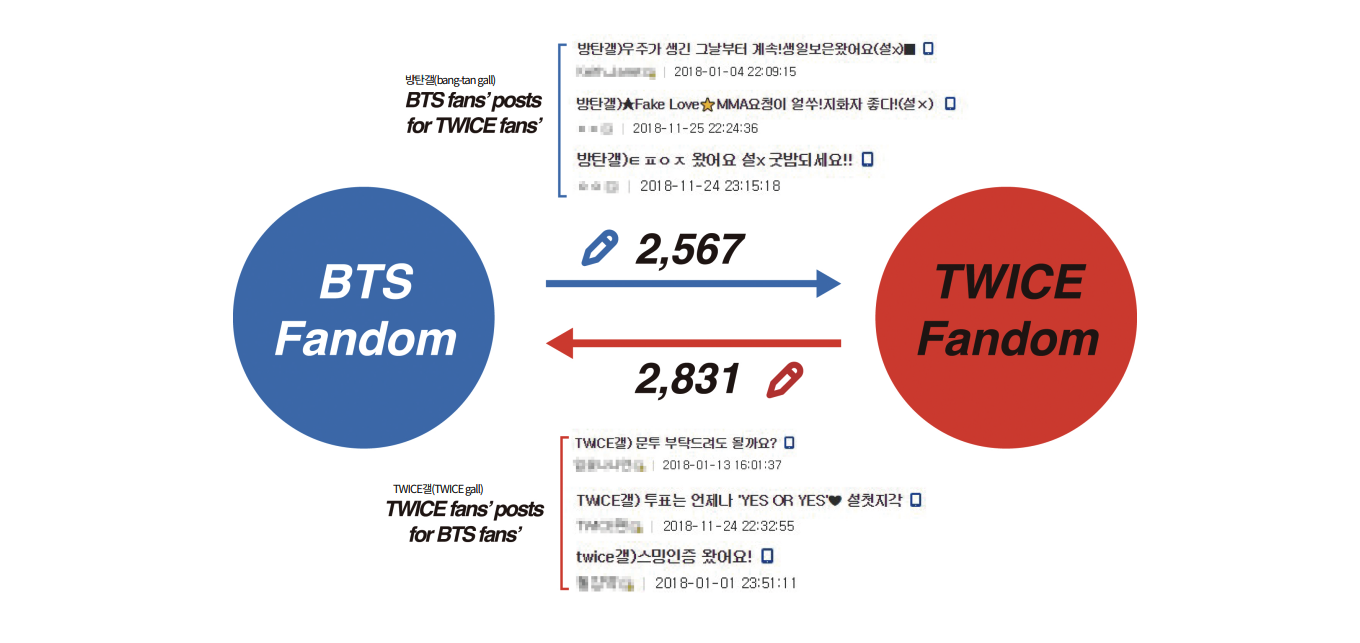

### Fandom Collaborate Network
- 디씨인사이드 갤러리에서 K-POP 팬덤 데이터 수집
- 각 팬덤을 노드로, 팬덤 간 상호작용을 엣지로 한 Fandom Collaborate Network 구축.

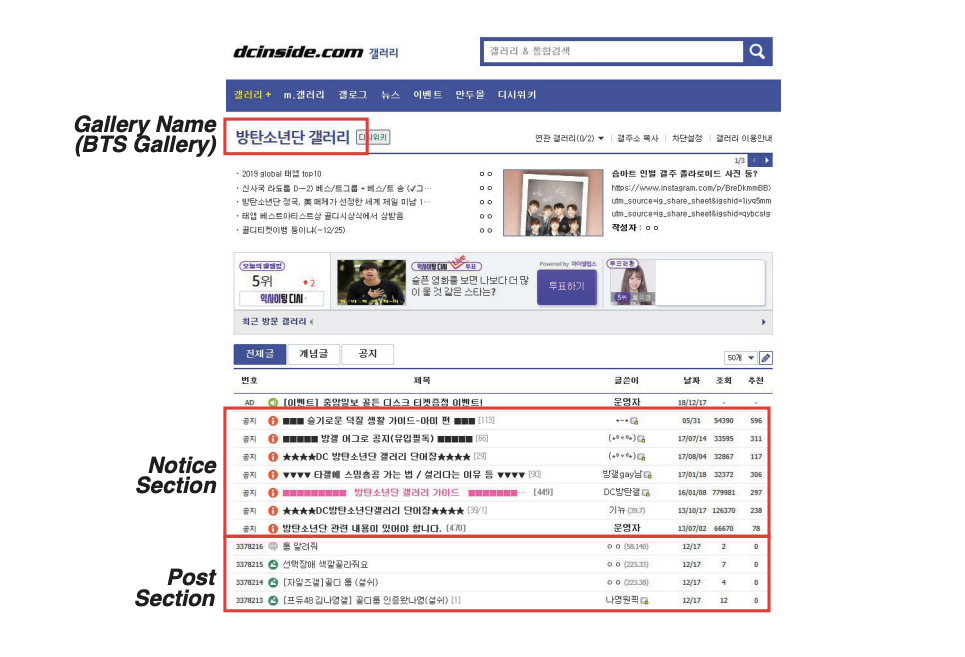

## Graph Visualization with Gephi
- 수집한 데이터를 기반으로, fandom collaboration graph 구축

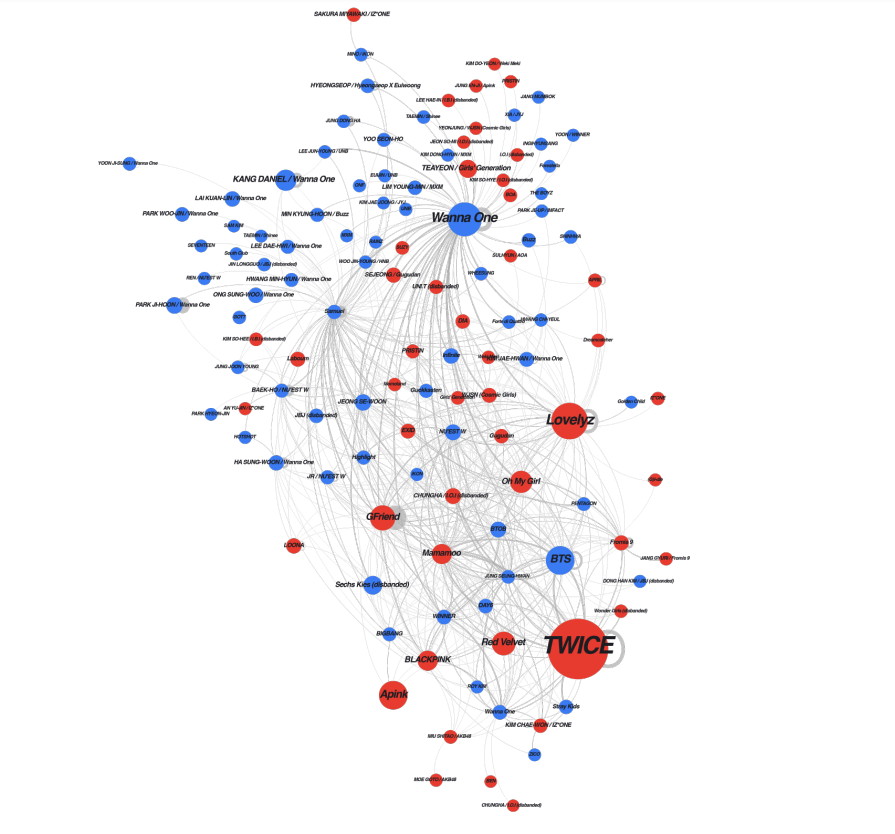

## Research Question
1. K-POP에서 얼마나 Fandom간 Collaboration이 활발히 일어나는가?
2. 보다 활발히 활동하는 Fandom이 협력에도 더 많이 참여하는가?
3. Fandom 간의 협력이 상호적으로 일어나는가 그렇지 않은가?
4. Fandom Collaboration에서 다른 Fandom보다 더 중요한 역할을 하는 팬덤이 존재하는가?

> 이러한 분석 결과는 K-POP 팬덤들 뿐만 아니라, agency, artist, maketer 등 다양한 K-POP 관련 종사자들에게 좋은 인사이트로 활용될 수 있음.

---

## 1. Environment Setting

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load Dataset

### [Node] : K-POP 팬덤 266개

In [2]:
nodes = pd.read_csv('fandom_nodes.csv', index_col='fandom_id')
nodes

,fandom_name,jan_post,feb_post,type
fandom_id,,,,
000115sh,KIM SU-HYUN : 김수현(미스틱),1547,249,0
19980917,KIM DONG-HYUN / MXM : 김동현,3869,2853,1
2PM,2PM,1787,355,1
6kies,SECHSKIES : 젝스키스,49116,23535,1
Jessica,JESSICA : 제시카,1091,546,0
...,...,...,...,...
yoonjo,YOON JO / UNI.T : 윤조,1555,1358,0
yooyeonjung,YEONJUNG / WJSN (Cosmic Girls) : 유연정,4059,2670,0
youjung,CHOI YOOJUNG / Weki Meki : 최유정,9914,9340,0


- fandom_id: 팬덤의 노드이름
- fandom_name: 팬덤  이름
- jan_post:  1월 팬  커뮤니티 내 게시글 수(도움을 위한 게시글 제외)
- feb_post:  2월 팬  커뮤니티 내 게시글 수(도움을 위한 게시글 제외)
- type : group type (boy, girl)

### [Edge] K-pop 팬덤 간의 협력 (25,903개)

In [3]:
edges = pd.read_csv('fandom_edges.csv')
edges

,source,target,jan_support,feb_support
0,000115sh,000115sh,0,1
1,000115sh,Jessica,15,0
2,000115sh,ahnhyungsub,30,1
3,000115sh,bigjaejun,13,0
4,000115sh,binhjleehjh,29,1
...,...,...,...,...
25898,yuseonho,yoonjisung,39,0
25899,yuseonho,yuseonho,62,32
25900,zico,fromis,1,0
25901,zico,kimsohee,1,0


- source: source node
- target: taget node
- jan_support: 1월 도움 횟수 
- feb_support:  2월 도움 횟수

## Fandom Collaborate Graph 
- G = (V, E, W) (directed / weighted) 그래프 생성.
- Node는 팬덤, Edge 는 한 팬덤이 다른 팬덤으로 도움을 주는 경우에 해당.
- Weight는 source 팬덤이 target 팬덤에게 도움을 준 횟수 (posting 개수)를 나타냄.

In [6]:
# Total Support (팬덤사이의 전체 도움 횟수) = 1월 도움 + 2월 도움
edges['total_support'] = edges['jan_support'] + edges['feb_support']
edges

,source,target,jan_support,feb_support,total_support
0,000115sh,000115sh,0,1,1
1,000115sh,Jessica,15,0,15
2,000115sh,ahnhyungsub,30,1,31
3,000115sh,bigjaejun,13,0,13
4,000115sh,binhjleehjh,29,1,30
...,...,...,...,...,...
25898,yuseonho,yoonjisung,39,0,39
25899,yuseonho,yuseonho,62,32,94
25900,zico,fromis,1,0,1
25901,zico,kimsohee,1,0,1


In [7]:
# edge 쌍 리스트
edges.loc[:, ('source', 'target')].values.tolist()

[['000115sh', '000115sh'],
 ['000115sh', 'Jessica'],
 ['000115sh', 'ahnhyungsub'],
 ['000115sh', 'bigjaejun'],
 ['000115sh', 'binhjleehjh'],
 ['000115sh', 'buzz'],
 ['000115sh', 'cmg'],
 ['000115sh', 'cosmicgirl'],
 ['000115sh', 'daewon'],
 ['000115sh', 'dmlwlsska'],
 ['000115sh', 'doitamazing7'],
 ['000115sh', 'dongho'],
 ['000115sh', 'feeldog'],
 ['000115sh', 'fortediquattro'],
 ['000115sh', 'fromis'],
 ['000115sh', 'girllaboum'],
 ['000115sh', 'gooddayjiwon'],
 ['000115sh', 'guckkasten'],
 ['000115sh', 'gunmin'],
 ['000115sh', 'gx9'],
 ['000115sh', 'hby'],
 ['000115sh', 'hotshot'],
 ['000115sh', 'imfactaeho'],
 ['000115sh', 'imhangyeol'],
 ['000115sh', 'jaejoong'],
 ['000115sh', 'jbj'],
 ['000115sh', 'jdh'],
 ['000115sh', 'jihansol'],
 ['000115sh', 'jinseongho'],
 ['000115sh', 'jjp'],
 ['000115sh', 'jongshin'],
 ['000115sh', 'joohaknyeon'],
 ['000115sh', 'jsh'],
 ['000115sh', 'jungchaeyeon'],
 ['000115sh', 'junsu'],
 ['000115sh', 'kantoz'],
 ['000115sh', 'kim'],
 ['000115sh', 'kimbo

In [8]:
# Directed Graph
graph = nx.DiGraph(edges.loc[:, ('source', 'target')].values.tolist())
graph.number_of_edges(), graph.number_of_nodes()

(25903, 252)

In [9]:
# Add weight
edges_weight = edges.loc[:, ('source', 'target', 'total_support')].values.tolist()
graph.add_weighted_edges_from(edges_weight)

In [10]:
# Check
for i, edata in enumerate(graph.edges(data=True)):
    print(i, edata)
    break

0 ('000115sh', '000115sh', {'weight': 1})


---

## Q1. K-POP 팬덤 내 팬덤 협력이 얼마나 활발한가, 또 어느 팬덤에서 활발한가?

### a. K-POP 팬덤 내 협력이 얼마나 활발한가?
- 팬덤사이의 전체 도움 수 / 전체 팬덤들의 전체 활동 수

In [11]:
# total_support (팬덤사이의 도움 횟수) = 1월 협력 + 2월 협력
edges

,source,target,jan_support,feb_support,total_support
0,000115sh,000115sh,0,1,1
1,000115sh,Jessica,15,0,15
2,000115sh,ahnhyungsub,30,1,31
3,000115sh,bigjaejun,13,0,13
4,000115sh,binhjleehjh,29,1,30
...,...,...,...,...,...
25898,yuseonho,yoonjisung,39,0,39
25899,yuseonho,yuseonho,62,32,94
25900,zico,fromis,1,0,1
25901,zico,kimsohee,1,0,1


In [13]:
# Total Post (팬덤들의 활동 횟수) = 1월 게시글 + 2월 게시글
nodes['total_post'] = nodes['jan_post'] + nodes['feb_post']
nodes

,fandom_name,jan_post,feb_post,type,total_post
fandom_id,,,,,
000115sh,KIM SU-HYUN : 김수현(미스틱),1547,249,0,1796
19980917,KIM DONG-HYUN / MXM : 김동현,3869,2853,1,6722
2PM,2PM,1787,355,1,2142
6kies,SECHSKIES : 젝스키스,49116,23535,1,72651
Jessica,JESSICA : 제시카,1091,546,0,1637
...,...,...,...,...,...
yoonjo,YOON JO / UNI.T : 윤조,1555,1358,0,2913
yooyeonjung,YEONJUNG / WJSN (Cosmic Girls) : 유연정,4059,2670,0,6729
youjung,CHOI YOOJUNG / Weki Meki : 최유정,9914,9340,0,19254


In [14]:
# 전체 팬덤의 도움 횟수
edges['total_support'].sum()

783286

In [15]:
# 전체 팬덤의 활동 횟수
nodes['total_post'].sum()

3681780

In [16]:
print("전체 팬덤 활동 수 대비 팬덤 도움 수 : {:.2f} ".format(edges['total_support'].sum() / nodes['total_post'].sum()))

전체 팬덤 활동 수 대비 팬덤 도움 수 : 0.21 


> 전체 게시글 중 약 21% 정도의 게시글이 팬덤 간 도움과 관련된 글이었음을 보았을 때, K-POP 내 팬덤간 협력이 적극적으로 이루어지고 있음을 알 수 있음.

### b. 어떤 팬덤에서 협력이 활발하게 이루어지고 있는가?

In [17]:
edges

,source,target,jan_support,feb_support,total_support
0,000115sh,000115sh,0,1,1
1,000115sh,Jessica,15,0,15
2,000115sh,ahnhyungsub,30,1,31
3,000115sh,bigjaejun,13,0,13
4,000115sh,binhjleehjh,29,1,30
...,...,...,...,...,...
25898,yuseonho,yoonjisung,39,0,39
25899,yuseonho,yuseonho,62,32,94
25900,zico,fromis,1,0,1
25901,zico,kimsohee,1,0,1


### 협력을 주는 팬덤 기준 (source)

In [18]:
# total support가 가장 많은 top-10 fandom
top10_supporting = edges.groupby('source').sum().sort_values('total_support', ascending=False).head(10)
top10_supporting

,jan_support,feb_support,total_support
source,,,
kim,10341,6079,16420
jbj,10340,4673,15013
girllaboum,7952,4144,12096
ohmygirl,9519,2282,11801
leejunyoung,7607,4131,11738
chungha,8190,3419,11609
woojinyoung,10022,1482,11504
highlight,4488,6514,11002
infinite,6239,4555,10794


In [19]:
# nodes 컬럼과 inner join 한 뒤, 내림차순 정렬
nodes.join(top10_supporting, how='inner').sort_values('total_support', ascending=False)[['fandom_name', 'total_support']]

,fandom_name,total_support
kim,Samuel / Samuel : 김사무엘,16420
jbj,JBJ,15013
girllaboum,Laboum : 라붐,12096
ohmygirl,Oh My Girl : 오마이걸,11801
leejunyoung,LEE JUN-YOUNG / UNB : 이준영,11738
chungha,CHUNGHA / I.O.I : 김청하,11609
woojinyoung,WOO JIN-YOUNG / HNB : 우진영,11504
highlight,Highlight : 하이라이트,11002
infinite,Infinite : 인피니트,10794
leesoomin,LEE SOO-MIN : 보컬 이수민,10788


### 협력을 받는 팬덤 기준 (target)

In [20]:
top10_supported = edges.groupby('target').sum().sort_values('total_support', ascending=False).head(10)
top10_supported

,jan_support,feb_support,total_support
target,,,
kim,13235,9715,22950
jbj,12973,6864,19837
leejunyoung,11506,6667,18173
jungsewoon,9295,5320,14615
leesoomin,11972,2618,14590
dongho,9168,5419,14587
girllaboum,7906,6645,14551
mkyunghoon,8745,4988,13733
ohmygirl,7169,6205,13374


In [21]:
nodes.join(top10_supported, how='inner').sort_values('total_support', ascending=False)[['fandom_name', 'total_support']]

,fandom_name,total_support
kim,Samuel / Samuel : 김사무엘,22950
jbj,JBJ,19837
leejunyoung,LEE JUN-YOUNG / UNB : 이준영,18173
jungsewoon,JEONG SE-WOON : 정세운,14615
leesoomin,LEE SOO-MIN : 보컬 이수민,14590
dongho,BAEK-HO / NU'EST W : 강동호 (백호),14587
girllaboum,Laboum : 라붐,14551
mkyunghoon,MIN KYUNG-HOON / Buzz : 민경훈,13733
ohmygirl,Oh My Girl : 오마이걸,13374
wartortle,JR / NU'EST W : 김종현(JR),12724


---

##  Q2. 팬덤 활동이 많은 그룹이 도움을 주고 받는 데에도 활발한가?
- 각 팬덤의 전체 활동량과 도움과 관련된 활동량이 비례하는지 알아보자. (상관계수 활용)

In [22]:
# Source/Target 별로 groupby
total_supporting = edges.groupby('source').sum()['total_support'] # 각 팬덤별 도움을 준 횟수
total_supported = edges.groupby('target').sum()['total_support'] # 각 팬덤별 도움을 받은 횟수

In [23]:
total_supporting.name = 'total_supporting'
total_supported.name = 'total_supported'

In [24]:
total_supporting = pd.DataFrame(total_supporting).join(nodes['total_post'], how='left') # 팬덤별 총 활동 수 정보 추가
total_supported = pd.DataFrame(total_supported).join(nodes['total_post'], how='left') # 팬덤별 총 활동 수 정보 추가

In [25]:
total_supporting

,total_supporting,total_post
source,,
000115sh,1530,1796
19980917,2312,6722
2PM,2007,2142
6kies,4674,72651
Jessica,1175,1637
...,...,...
yoonjo,2146,2913
yooyeonjung,3525,6729
youjung,2003,19254


In [26]:
total_supported

,total_supported,total_post
target,,
000115sh,1330,1796
19980917,2012,6722
2PM,353,2142
6kies,5012,72651
Jessica,798,1637
...,...,...
yoonjo,1435,2913
yooyeonjung,2250,6729
youjung,4850,19254


## Spearman rank correlation
- df.corr(method = 'spearman')

In [48]:
pd.DataFrame(total_supporting.corr(method="spearman")['total_post'])

,total_post
total_supporting,0.705741
total_post,1.000000


In [49]:
pd.DataFrame(total_supported.corr(method="spearman")['total_post'])

,total_post
total_supported,0.567979
total_post,1.000000


> 해석 : 스피어만 상관 계수 측정 결과, 도움을 주는 팬덤 및 도움을 받는 팬덤을 기준으로 각각 0.70, 0.56으로 나온 것으로 보아 active 팬덤이 팬덤 간 collaboration도 활발한 것을 알 수 있음.

---

## Q3. Fandom 간의 협력이 상호적으로 발생하는가(reciprocal) 그렇지 않은가?
- in-degree와 out-degree 활용 (in-degree: 내가 supporting하는 팬덤, out-degree: 나를 supporting하는 팬덤)

### Degree

In [ ]:
# 각 팬덤 노드를 supporting하는 팬덤 수
# graph.in_degree()

In [ ]:
# 각 팬덤 노드에서 supporting하는 팬덤 수 
# graph.out_degree()

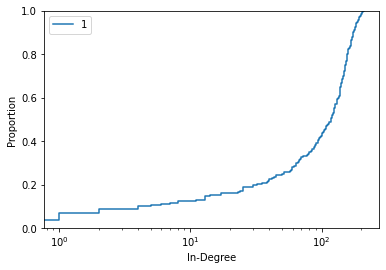

In [29]:
sns.ecdfplot(graph.in_degree())
plt.xscale('log')
plt.xlabel('In-Degree')
plt.ylabel('Proportion')
plt.show()
plt.close()

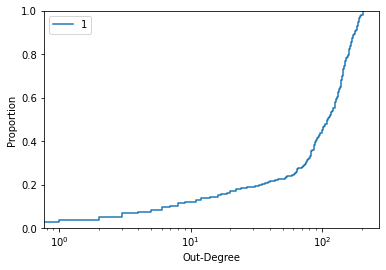

In [30]:
sns.ecdfplot(graph.out_degree())
plt.xscale('log')
plt.xlabel('Out-Degree')
plt.ylabel('Proportion')
plt.show()
plt.close()

### #of posting

In [31]:
edges

,source,target,jan_support,feb_support,total_support
0,000115sh,000115sh,0,1,1
1,000115sh,Jessica,15,0,15
2,000115sh,ahnhyungsub,30,1,31
3,000115sh,bigjaejun,13,0,13
4,000115sh,binhjleehjh,29,1,30
...,...,...,...,...,...
25898,yuseonho,yoonjisung,39,0,39
25899,yuseonho,yuseonho,62,32,94
25900,zico,fromis,1,0,1
25901,zico,kimsohee,1,0,1


In [32]:
supported = edges.groupby('target').sum()['total_support'] # 각 팬덤별 도움을 받은 횟수
supporting = edges.groupby('source').sum()['total_support'] # 각 팬덤별 도움을 준 횟수

In [33]:
supported = pd.DataFrame(supported).rename(columns={'total_support': 'supported'})
supporting = pd.DataFrame(supporting).rename(columns={'total_support': 'supporting'})

In [34]:
# join
post = supporting.join(supported, how='outer')
post

,supporting,supported
000115sh,1530.0,1330.0
19980917,2312.0,2012.0
2PM,2007.0,353.0
6kies,4674.0,5012.0
Jessica,1175.0,798.0
...,...,...
yoonjo,2146.0,1435.0
yooyeonjung,3525.0,2250.0
youjung,2003.0,4850.0
yuseonho,3589.0,6835.0


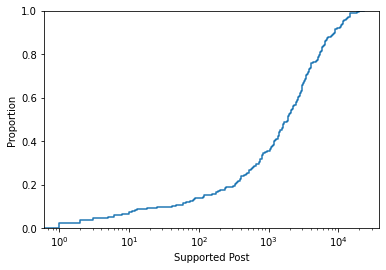

In [35]:
sns.ecdfplot(post['supported'])
plt.xscale('log')
plt.xlabel('Supported Post')
plt.ylabel('Proportion')
plt.show()
plt.close()

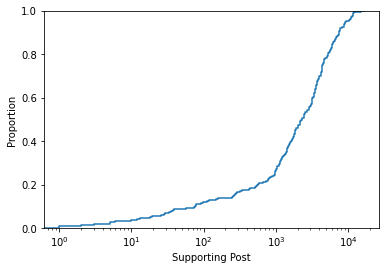

In [36]:
sns.ecdfplot(post['supporting'])
plt.xscale('log')
plt.xlabel('Supporting Post')
plt.ylabel('Proportion')
plt.show()
plt.close()

### Ratio

In [40]:
# ratio : in_post / out_post
post['ratio'] = post['supported'] / post['supporting']

In [41]:
post

,supporting,supported,ratio
000115sh,1530.0,1330.0,0.869281
19980917,2312.0,2012.0,0.870242
2PM,2007.0,353.0,0.175884
6kies,4674.0,5012.0,1.072315
Jessica,1175.0,798.0,0.679149
...,...,...,...
yoonjo,2146.0,1435.0,0.668686
yooyeonjung,3525.0,2250.0,0.638298
youjung,2003.0,4850.0,2.421368
yuseonho,3589.0,6835.0,1.904430


- ratio가 1일 때, 협력을 준 만큼 협력을 받은 것.
- ratio가 1보다 작을 때, 협력을 준 만큼 협력을 받지 못한 것.
- ratio가 1보다 클 때, 협력을 준 것보다 더 많은 협력을 받은 것.

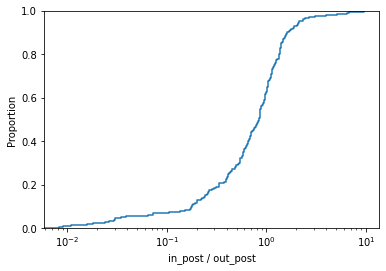

In [42]:
sns.ecdfplot(post['ratio'])
plt.xscale('log')
plt.xlabel('in_post / out_post')
plt.ylabel('Proportion')
plt.show()
plt.close()

> 많은 팬덤들이 다른 팬덤을 더 많이 supporting하지만 다른 팬덤으로부터 더 적은 이익(supported)을 얻는 경향이 있음을 알 수 있으며, 소수의 팬덤 (약 25%)만이 상호적(reciprocal)이고 공정하게 협력함.

## Q4. Fandom Collaboration에서 다른 Fandom보다 더 중요한 역할을 하는 팬덤이 존재하는가?


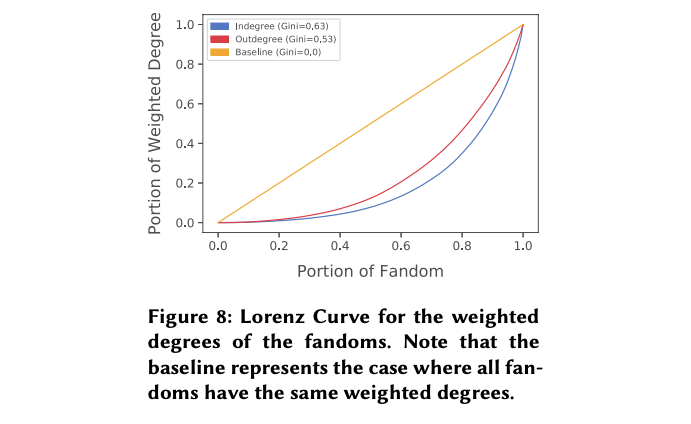

### Lorenz Curve
    - baseline 기준선과 일치할수록 균등한 상태 (모든 팬덤이 균등하게 협력하는 상태) 
    - baseline 기준선과 멀어질수록 불균등한 상태 (일부 팬덤이 전체 협력의 많은 부분을 차지하는 상태)
### 결과 해석
    - 팬덤 협력의 분포가 치우쳐져 있어, 불균등한 상태임을 나타내며 특히 in-degree에서의 불균등이 더 심함.
    - 즉, 일부 팬덤이 다른 팬덤에 비해 supported를 특히 많이 받고 있는 상태임을 알 수 있음. (=더 중요한 역할을 하고 있음)

### 그렇다면, 어떤 팬덤이 fandom collaboration에서 중요한 역할을 하는가?

# PageRank
- Google 서치 엔진의 핵심이 되는 알고리즘.
- 보다 나은 웹 검색 결과를 출력하는 데에서 출발, 네트워크 내의 노드의 중요성을 보기 위해 전반적으로 사용됨.
- 중요한 노드란? : Trust, Important!

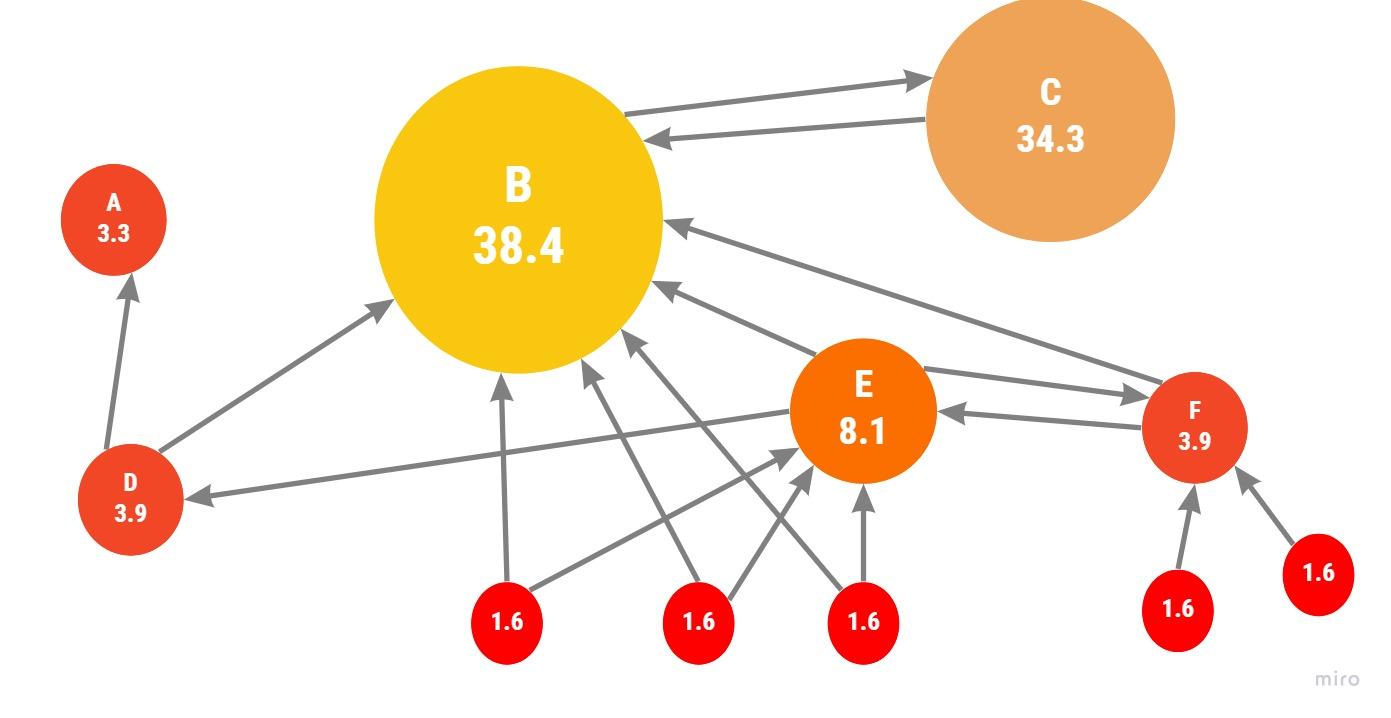

[이미지 출처] https://networkx.guide/algorithms/link-analysis/pagerank/

### 웹 관점에서의 중요한 페이지란?
- 많은 곳에서 해당 페이지를 reference하고 있으며 (Trust) 보다 중요한 페이지에서 reference하는 것! (important)

### K-POP 팬덤 네트워크 관점에서의 중요한 노드란?
- 많은 팬덤에서 해당 팬덤을 support하고 있으며 (Trust), 보다 영향력이 강한 팬덤에서 support하는 팬덤! (important)

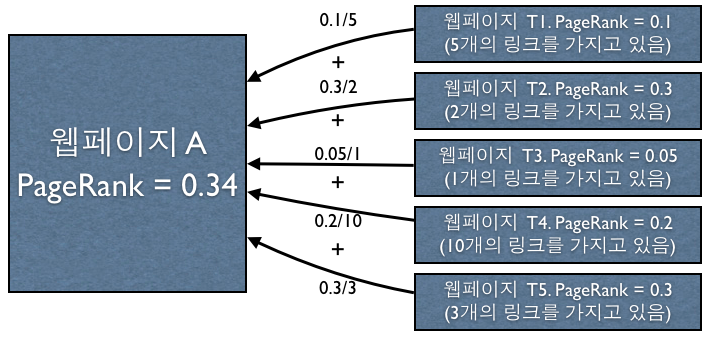


[PageRank 참고자료] https://sungmooncho.com/2012/08/26/pagerank/

즉, 한 팬덤에게 supporting하는 팬덤이 많을수록, 그리고 그 팬덤들이 전체 네트워크에서 중요한 팬덤일수록 해당 팬덤의 importance는 높아진다!

In [43]:
# PageRank 스코어 산출 
pr = nx.pagerank(graph)

In [44]:
pr_df = pd.DataFrame(data={'pr_score': list(pr.values())}, index=list(pr.keys()))
pr_df

,pr_score
000115sh,0.002265
Jessica,0.001463
ahnhyungsub,0.007253
bigjaejun,0.001793
binhjleehjh,0.004134
...,...
wendy,0.000723
zico,0.000723
sf9,0.000722
unitb,0.000722


In [45]:
# fandom 정보와 연결, PageRank 스코어 기준 상위 20개의 팬덤 출력. 
pr_join = nodes.join(pr_df, how='inner').sort_values('pr_score', ascending=False).iloc[:20][['fandom_name', 'total_post', 'pr_score']]
pr_join

,fandom_name,total_post,pr_score
kim,Samuel / Samuel : 김사무엘,20984,0.024618
jbj,JBJ,44850,0.021873
leejunyoung,LEE JUN-YOUNG / UNB : 이준영,17261,0.021132
leesoomin,LEE SOO-MIN : 보컬 이수민,11618,0.016858
dongho,BAEK-HO / NU'EST W : 강동호 (백호),15479,0.016787
girllaboum,Laboum : 라붐,20417,0.016601
mkyunghoon,MIN KYUNG-HOON / Buzz : 민경훈,25838,0.015427
winkgall,PARK JI-HOON / Wanna One : 박지훈,43462,0.014747
jungsewoon,JEONG SE-WOON : 정세운,47905,0.014614
kdani,KANG DANIEL / Wanna One : 강다니엘,89506,0.014498


In [46]:
# 앞에서 구한 supporting, supported 개수와 이에 대한 비율 정보 추가
pr_join.join(post, how='inner')

,fandom_name,total_post,pr_score,supporting,supported,ratio
kim,Samuel / Samuel : 김사무엘,20984,0.024618,16420.0,22950.0,1.397686
jbj,JBJ,44850,0.021873,15013.0,19837.0,1.321322
leejunyoung,LEE JUN-YOUNG / UNB : 이준영,17261,0.021132,11738.0,18173.0,1.548219
leesoomin,LEE SOO-MIN : 보컬 이수민,11618,0.016858,10788.0,14590.0,1.352429
dongho,BAEK-HO / NU'EST W : 강동호 (백호),15479,0.016787,6245.0,14587.0,2.335789
girllaboum,Laboum : 라붐,20417,0.016601,12096.0,14551.0,1.202960
mkyunghoon,MIN KYUNG-HOON / Buzz : 민경훈,25838,0.015427,8677.0,13733.0,1.582690
winkgall,PARK JI-HOON / Wanna One : 박지훈,43462,0.014747,5851.0,10803.0,1.846351
jungsewoon,JEONG SE-WOON : 정세운,47905,0.014614,10288.0,14615.0,1.420587
kdani,KANG DANIEL / Wanna One : 강다니엘,89506,0.014498,5750.0,12229.0,2.126783


---

## ✅ 실습 제출 파일 안내
- 중간 중간 비워진 코드를 채워 제출하십시오.
- 금일 자정(00:00)까지 제출해주십시오.